# **1. Data import**

Use the mne library to read the .gdf datas. Here I choose the data of first, second and third volunteer to perform the training.




I upload the datas to the google drive, so I use the following two rows of code to connect the google drive. When running the code, you can just upload the data, no need to process these two rows of data.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import the data using mne library, which is a library professional in processing the EEG signal data.

In [89]:
!pip install mne
import mne
%matplotlib inline
import numpy as np

filename = ["/content/drive/MyDrive/A01T.gdf","/content/drive/MyDrive/A09T.gdf","/content/drive/MyDrive/A03T.gdf"]
raw = []
for i in filename:
  raw.append(mne.io.read_raw_gdf(i))

print(raw[0].info)
print(raw[0].ch_names)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Extracting EDF parameters from /content/drive/MyDrive/A01T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/A02T.gdf...
GDF file detected
Setting channel info structure...
Could not determine channel type of the following channels, they will be set as EEG:
EEG-Fz, EEG, EEG, EEG, EEG, EEG, EEG, EEG-C3, EEG, EEG-Cz, EEG, EEG-C4, EEG, EEG, EEG, EEG, EEG, EEG, EEG, EEG-Pz, EEG, EEG, EOG-left, EOG-central, EOG-right
Creating raw.info structure...
Extracting EDF parameters from /content/drive/MyDrive/A03T.gdf...
GDF file detected
Setting channel info structure...

/usr/lib/python3.9/contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)
/usr/lib/python3.9/contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)
/usr/lib/python3.9/contextlib.py:126: RuntimeWarning: Channel names are not unique, found duplicates for: {'EEG'}. Applying running numbers for duplicates.
  next(self.gen)


Do the band path filter to the data, drop out the data of three EOG channels, which are useless for EEG signal classification, and extract the data of the motor imagination.

In [90]:
epochs = []
for i in raw:

  # Find the events time positions
  events, _ = mne.events_from_annotations(i)

  # Pre-load the data

  i.load_data()

  # Filter the raw signal with a band pass filter in 7-35 Hz

  i.filter(7., 35., fir_design='firwin')

  # Remove the EOG channels and pick only desired EEG channels

  i.info['bads'] += ['EOG-left', 'EOG-central', 'EOG-right']

  picks = mne.pick_types(i.info, meg=False, eeg=True, eog=False, stim=False,
                        exclude='bads')

  # Extracts epochs of 3s time period from the datset into 288 events for all 4 classes

  tmin, tmax = 1, 4
  # left_hand = 769,right_hand = 770,foot = 771,tongue = 772
  event_id = dict({'769': 7,'770': 8,'771': 9,'772': 10})

  epochs.append(mne.Epochs(i, events, event_id, tmin, tmax, proj=True, picks=picks,
                  baseline=None, preload=True))

Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Reading 0 ... 672527  =      0.000 ...  2690.108 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s


Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 751 original time points ...


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.9s finished


0 bad epochs dropped
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Reading 0 ... 673327  =      0.000 ...  2693.308 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    3.4s finished


Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 751 original time points ...
0 bad epochs dropped
Used Annotations descriptions: ['1023', '1072', '276', '277', '32766', '768', '769', '770', '771', '772']
Reading 0 ... 660529  =      0.000 ...  2642.116 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 7 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 413 samples (1.652 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Not setting metadata
288 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 288 events and 751 original time points ...
0 bad epochs dropped


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.7s finished


Left hand epoch average plot
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


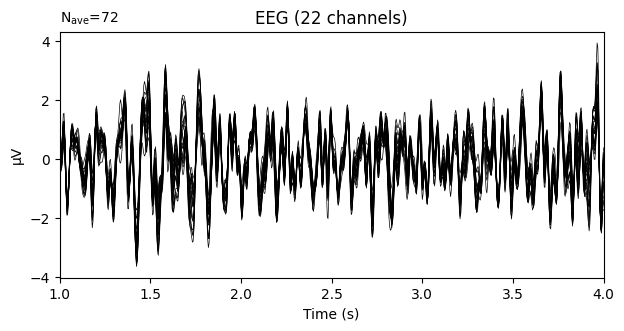

Right hand epoch average plot
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


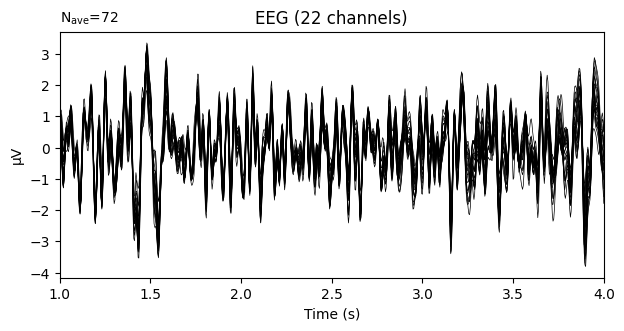

Foot epoch average plot
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


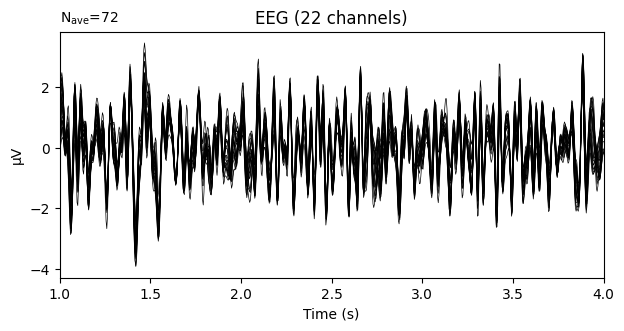

Tongue epoch average plot
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


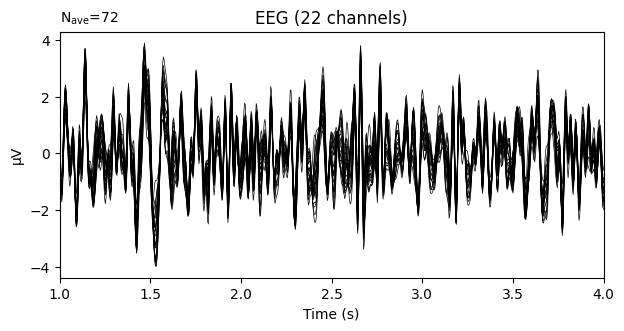

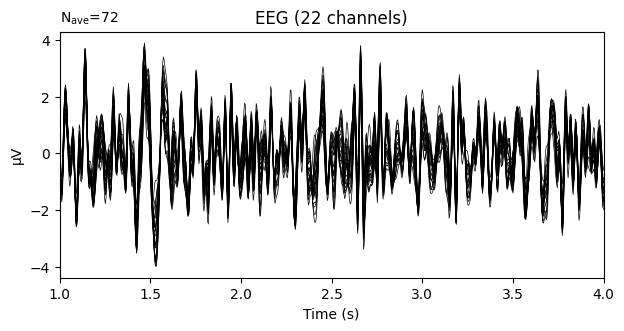

In [79]:
# left_hand = 769,right_hand = 770,foot = 771,tongue = 772

# Left hand epoch average plot
print('Left hand epoch average plot')
evoked = epochs[2]['769'].average()
evoked.plot(time_unit='s')

# Right hand epoch average plot
print('Right hand epoch average plot')
evoked = epochs[2]['770'].average()
evoked.plot(time_unit='s')

# Foot epoch average plot
print('Foot epoch average plot')
evoked = epochs[2]['771'].average()
evoked.plot(time_unit='s')

# Tongue epoch average plot
print('Tongue epoch average plot')
evoked = epochs[2]['772'].average()
evoked.plot(time_unit='s')

# **2. Model training**



Normalize the data before training.

In [91]:
data = []
labels = []
for i in epochs:
  labels.append(i.events[:,-1] - 7)
  data_x= i.get_data()
  data_x = data_x[:,np.newaxis,:,:]
  data_mean = data_x.mean(axis=(0, 3), keepdims=True)
  data_std = data_x.std(axis=(0, 3), keepdims=True)
  data.append((data_x - data_mean) / data_std)

First, use the FBCSP and shallow dense network to classify the data. The FBCSP method is a commonly used feature extraction method for EEG signal. This experiment acts as a comparison of the result of EEGNet and ConvNet.

In [57]:
from mne.decoding import CSP # Common Spatial Pattern Filtering
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers
from sklearn.model_selection import ShuffleSplit
# Cross Validation Split
cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)

from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [62]:
import pywt
def wpd(X): 
    coeffs = pywt.WaveletPacket(X,'db4',mode='symmetric',maxlevel=5)
    return coeffs
             
def feature_bands(x):
    
    Bands = np.empty((8,x.shape[0],x.shape[1],30)) # 8 freq band coefficients are chosen from the range 4-32Hz
    
    for i in range(x.shape[0]):
        for ii in range(x.shape[1]):
             pos = []
             C = wpd(x[i,ii,:]) 
             pos = np.append(pos,[node.path for node in C.get_level(5, 'natural')])
             for b in range(1,9):
                 Bands[b-1,i,ii,:] = C[pos[b]].data
        
    return Bands
def build_classifier(num_layers = 1):
    classifier = Sequential()
    #First Layer
    classifier.add(Dense(units = 124, kernel_initializer = 'uniform', activation = 'relu', input_dim = 32, 
                         kernel_regularizer=regularizers.l2(0.01))) # L2 regularization
    classifier.add(Dropout(0.5))
    # Intermediate Layers
    for itr in range(num_layers):
        classifier.add(Dense(units = 124, kernel_initializer = 'uniform', activation = 'relu', 
                             kernel_regularizer=regularizers.l2(0.01))) # L2 regularization
        classifier.add(Dropout(0.5))   
    # Last Layer
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'softmax'))
    classifier.compile(optimizer = 'rmsprop' , loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return classifier
acc_FBCSP = []
for i in range(len(data)):
  data2 = data[i][:,0,:,:]
  label2 = labels[i]-1

  enc = OneHotEncoder()
  X_out = enc.fit_transform(label2.reshape(-1,1)).toarray()

  cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)
  acc = []
  wpd_data = feature_bands(data2)
  for train_idx, test_idx in cv.split(label2):
    
    Csp = [];ss = [];nn = [] # empty lists
    
    label_train, label_test = label2[train_idx], label2[test_idx]
    y_train, y_test = X_out[train_idx], X_out[test_idx]
    
    # CSP filter applied separately for all Frequency band coefficients
    
    Csp = [CSP(n_components=4, reg=None, log=True, norm_trace=False) for _ in range(8)]
    ss = preprocessing.StandardScaler()

    X_train = ss.fit_transform(np.concatenate(tuple(Csp[x].fit_transform(wpd_data[x,train_idx,:,:],label_train) for x  in range(8)),axis=-1))

    X_test = ss.transform(np.concatenate(tuple(Csp[x].transform(wpd_data[x,test_idx,:,:]) for x  in range(8)),axis=-1))
    
    nn = build_classifier()  
    
    nn.fit(X_train, y_train, batch_size = 32, epochs = 300)
    
    y_pred = nn.predict(X_test)
    pred = (y_pred == y_pred.max(axis=1)[:,None]).astype(int)
    acc.append(accuracy_score(y_test.argmax(axis=1), pred.argmax(axis=1)))
  acc_FBCSP.append(acc)

流式输出内容被截断，只能显示最后 5000 行内容。
Epoch 277/300
8/8 [==============================] - 0s 4ms/step - loss: 0.0889 - accuracy: 1.0000
Epoch 278/300
8/8 [==============================] - 0s 5ms/step - loss: 0.0908 - accuracy: 0.9870
Epoch 279/300
8/8 [==============================] - 0s 5ms/step - loss: 0.0887 - accuracy: 0.9913
Epoch 280/300
8/8 [==============================] - 0s 4ms/step - loss: 0.0933 - accuracy: 0.9913
Epoch 281/300
8/8 [==============================] - 0s 4ms/step - loss: 0.1043 - accuracy: 0.9913
Epoch 282/300
8/8 [==============================] - 0s 4ms/step - loss: 0.1180 - accuracy: 0.9826
Epoch 283/300
8/8 [==============================] - 0s 4ms/step - loss: 0.0967 - accuracy: 0.9913
Epoch 284/300
8/8 [==============================] - 0s 4ms/step - loss: 0.0908 - accuracy: 0.9957
Epoch 285/300
8/8 [==============================] - 0s 4ms/step - loss: 0.0876 - accuracy: 0.9957
Epoch 286/300
8/8 [==============================] - 0s 4ms/step - loss: 0.1037 - 

In [76]:
np.save('acc_FBCSP.npy',np.array(acc_FBCSP))

Build the EEGNet, and the Convolution Network(ConvNet) which has similiar
structure as EEGNet, but without using the depthwidth and separable convolution layer.

Number of parameters for EEGNet: 2,932

Number of parameters for ConvNet: 8,980


In [82]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import numpy as np
import torch.nn.functional as F

In [83]:
class EEGNet(nn.Module):
    def __init__(self):
        super(EEGNet, self).__init__()
        self.F1 = 8
        self.F2 = 16
        self.D = 2
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, self.F1, (1, 64), padding=(0, 32), bias=False),
            nn.BatchNorm2d(self.F1)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(self.F1, self.D*self.F1, (22, 1), groups=self.F1, bias=False),
            nn.BatchNorm2d(self.D*self.F1),
            nn.ELU(),
            nn.AvgPool2d((1, 4)),
            nn.Dropout(0.5)
        )
        self.Conv3 = nn.Sequential(
            nn.Conv2d(self.D*self.F1, self.D*self.F1, (1, 16), padding=(0, 8), groups=self.D*self.F1, bias=False),
            nn.Conv2d(self.D*self.F1, self.F2, (1, 1), bias=False),
            nn.BatchNorm2d(self.F2),
            nn.ELU(),
            nn.AvgPool2d((1, 8)),
            nn.Dropout(0.5)
        )
        self.classifier = nn.Linear(16*23, 4, bias=True)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.Conv3(x)
        x = x.view(-1, 16*23)
        x = self.classifier(x)
        return x

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.F1 = 8
        self.F2 = 16
        self.D = 2
        self.conv1 = nn.Sequential(
            nn.Conv2d(1, self.F1, (1, 64), padding=(0, 32), bias=False),
            nn.BatchNorm2d(self.F1)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(self.F1, self.D*self.F1, (22, 1), bias=False),
            nn.BatchNorm2d(self.D*self.F1),
            nn.ELU(),
            nn.AvgPool2d((1, 4)),
            nn.Dropout(0.5)
        )
        self.Conv3 = nn.Sequential(
            nn.Conv2d(self.D*self.F1, self.F2, (1, 16), padding=(0, 8), bias=False),
            nn.BatchNorm2d(self.F2),
            nn.ELU(),
            nn.AvgPool2d((1, 8)),
            nn.Dropout(0.5)
        )
        self.classifier = nn.Linear(16*23, 4, bias=True)
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.Conv3(x)
        x = x.view(-1, 16*23)
        x = self.classifier(x)
        return x
model0 = EEGNet()
model1 = ConvNet()
params0 = sum(p.numel() for p in model0.parameters() if p.requires_grad)
params1 = sum(p.numel() for p in model1.parameters() if p.requires_grad)
print("Number of parameters for EEGNet: {:,}".format(params0))
print("Number of parameters for ConvNet: {:,}".format(params1))

Number of parameters for EEGNet: 2,932
Number of parameters for ConvNet: 8,980


Train and test the two models using **ten-fold cross-validation**.

In [101]:
from torch.utils.data import DataLoader,TensorDataset
def Train(model,data,labels,lr=0.001,batch_size=32,epochs=150,loss_plot=False):
  accs = []
  losss = []
  k = 0
  for train_idx, test_idx in cv.split(labels):
      k+=1
      ACC = 0
      model = EEGNet()
      optimizer = torch.optim.Adam(model.parameters(), lr=lr)
      y_train, y_test = labels[train_idx], labels[test_idx]
      x_train, x_test = data[train_idx,:,:,:], data[test_idx,:,:,:]
      train_dataset = TensorDataset(torch.tensor(x_train,dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
      test_dataset = TensorDataset(torch.tensor(x_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))
      train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
      test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
      for epoch in range(epochs):
        model.train()
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()

            y_pred = model(X_batch)
            loss = nn.functional.cross_entropy(y_pred, y_batch)
            loss.backward()
            optimizer.step()
        print(f"Epoch {epoch+1}, loss={loss.item():.4f}")
        if k == 1 and loss_plot == True:
          losss.append(loss)
        model.eval()
        with torch.no_grad():
            total_correct = 0
            total_num = 0
            for x, label in test_loader:
                logits = model(x)
                pred = logits.argmax(dim=1)
                correct = torch.eq(pred, label).float().sum().item()
                total_correct += correct
                total_num += x.size(0)
            acc = total_correct / total_num
        if acc>ACC:
            ACC=acc
        print(epoch+1, 'test acc:', acc)
      accs.append(ACC)
  acc_average = sum(accs)/len(accs)
  return acc_average,accs,losss

Use the data of the volunteer A01T to train.

In [18]:
model_ConVnet = ConvNet()
acc_average_Conv_T01,accs_Conv_T01,loss_Conv_T01 = Train(model=model_ConVnet,data=data[0],labels=labels[0],loss_plot=True)

Epoch 1, loss=1.4195
1 test acc: 0.29310344827586204
Epoch 2, loss=1.3016
2 test acc: 0.3448275862068966
Epoch 3, loss=1.1359
3 test acc: 0.43103448275862066
Epoch 4, loss=1.4219
4 test acc: 0.46551724137931033
Epoch 5, loss=1.3303
5 test acc: 0.4827586206896552
Epoch 6, loss=1.2836
6 test acc: 0.5344827586206896
Epoch 7, loss=1.6034
7 test acc: 0.5
Epoch 8, loss=1.2951
8 test acc: 0.5
Epoch 9, loss=1.1715
9 test acc: 0.5
Epoch 10, loss=0.8638
10 test acc: 0.5344827586206896
Epoch 11, loss=1.0744
11 test acc: 0.5517241379310345
Epoch 12, loss=1.0381
12 test acc: 0.5862068965517241
Epoch 13, loss=0.9159
13 test acc: 0.5689655172413793
Epoch 14, loss=0.6771
14 test acc: 0.5862068965517241
Epoch 15, loss=0.8019
15 test acc: 0.5862068965517241
Epoch 16, loss=0.9541
16 test acc: 0.5517241379310345
Epoch 17, loss=1.0134
17 test acc: 0.5689655172413793
Epoch 18, loss=0.6411
18 test acc: 0.6379310344827587
Epoch 19, loss=1.0436
19 test acc: 0.6379310344827587
Epoch 20, loss=0.7341
20 test acc:

In [19]:
accs_Conv_T01 = np.array(accs_Conv_T01)
for i in range(len(loss_Conv_T01)):
  loss_Conv_T01[i] = float(loss_Conv_T01[i])
loss_Conv_T01 = np.array(loss_Conv_T01)
np.save('acc_T01_ConvNet.npy',accs_Conv_T01)
np.save('loss_plot_T01_1_ConvNet.npy',loss_Conv_T01)

In [ ]:
model_eegnet = EEGNet()
acc_average,accs,loss = Train(model=model_eegnet,data=data[0],labels=labels[0],loss_plot=True)

Epoch 1, loss=1.4260
1 test acc: 0.27586206896551724
Epoch 2, loss=1.3563
2 test acc: 0.25862068965517243
Epoch 3, loss=1.3204
3 test acc: 0.29310344827586204
Epoch 4, loss=1.5646
4 test acc: 0.3448275862068966
Epoch 5, loss=1.2929
5 test acc: 0.27586206896551724
Epoch 6, loss=1.4554
6 test acc: 0.27586206896551724
Epoch 7, loss=1.2034
7 test acc: 0.2413793103448276
Epoch 8, loss=1.3369
8 test acc: 0.27586206896551724
Epoch 9, loss=1.2979
9 test acc: 0.29310344827586204
Epoch 10, loss=1.0622
10 test acc: 0.3620689655172414
Epoch 11, loss=1.2116
11 test acc: 0.41379310344827586
Epoch 12, loss=0.7652
12 test acc: 0.43103448275862066
Epoch 13, loss=0.9655
13 test acc: 0.4827586206896552
Epoch 14, loss=0.6600
14 test acc: 0.46551724137931033
Epoch 15, loss=1.1043
15 test acc: 0.5
Epoch 16, loss=0.9980
16 test acc: 0.4827586206896552
Epoch 17, loss=0.7985
17 test acc: 0.46551724137931033
Epoch 18, loss=0.9720
18 test acc: 0.4827586206896552
Epoch 19, loss=0.8254
19 test acc: 0.4827586206896

In [ ]:
accs = np.array(accs)
for i in range(len(loss)):
  loss[i] = int(loss[i])
loss = np.array(loss)
np.save('acc_T01_EEGNet.npy',accs)
np.save('loss_plot_T01_1_EEGNet.npy',loss)

Use the data of the volunteer A09T to train.

In [92]:
model_ConVnet = ConvNet()
#model_EEGNet = EEGNet()
acc_average_Conv_T09,accs_Conv_T09,k = Train(model=model_ConVnet,data=data[1],labels=labels[1],loss_plot=False)
#acc_average_EEG_T09,accs_EEG_T09,k = Train(model=model_EEGNet,data=data[1],labels=labels[1],loss_plot=False)
accs_Conv_T09 = np.array(accs_Conv_T09)
np.save('acc_T09_ConvNet.npy',accs_Conv_T09)
#accs_EEG_T09 = np.array(accs_EEG_T09)
#np.save('acc_T09_EEGNet.npy',accs_EEG_T09)

Epoch 1, loss=1.6099
1 test acc: 0.39655172413793105
Epoch 2, loss=1.4841
2 test acc: 0.3620689655172414
Epoch 3, loss=1.4045
3 test acc: 0.3275862068965517
Epoch 4, loss=1.3666
4 test acc: 0.3793103448275862
Epoch 5, loss=1.2590
5 test acc: 0.3793103448275862
Epoch 6, loss=1.2825
6 test acc: 0.41379310344827586
Epoch 7, loss=1.5856
7 test acc: 0.41379310344827586
Epoch 8, loss=1.1562
8 test acc: 0.4827586206896552
Epoch 9, loss=1.1568
9 test acc: 0.5172413793103449
Epoch 10, loss=1.3357
10 test acc: 0.5
Epoch 11, loss=0.9752
11 test acc: 0.5517241379310345
Epoch 12, loss=1.2554
12 test acc: 0.603448275862069
Epoch 13, loss=0.7356
13 test acc: 0.5689655172413793
Epoch 14, loss=0.9641
14 test acc: 0.603448275862069
Epoch 15, loss=0.8953
15 test acc: 0.603448275862069
Epoch 16, loss=0.7810
16 test acc: 0.5862068965517241
Epoch 17, loss=1.0656
17 test acc: 0.5862068965517241
Epoch 18, loss=0.9299
18 test acc: 0.5862068965517241
Epoch 19, loss=0.9911
19 test acc: 0.603448275862069
Epoch 20

In [93]:
#model_ConVnet = ConvNet()
model_EEGNet = EEGNet()
#acc_average_Conv_T09,accs_Conv_T09,k = Train(model=model_ConVnet,data=data[1],labels=labels[1],loss_plot=False)
acc_average_EEG_T09,accs_EEG_T09,k = Train(model=model_EEGNet,data=data[1],labels=labels[1],loss_plot=False)
#accs_Conv_T09 = np.array(accs_Conv_T09)
#np.save('acc_T09_ConvNet.npy',accs_Conv_T09)
accs_EEG_T09 = np.array(accs_EEG_T09)
np.save('acc_T09_EEGNet.npy',accs_EEG_T09)

Epoch 1, loss=1.3331
1 test acc: 0.20689655172413793
Epoch 2, loss=1.4225
2 test acc: 0.22413793103448276
Epoch 3, loss=1.3381
3 test acc: 0.29310344827586204
Epoch 4, loss=1.2660
4 test acc: 0.39655172413793105
Epoch 5, loss=1.3072
5 test acc: 0.3620689655172414
Epoch 6, loss=1.1749
6 test acc: 0.39655172413793105
Epoch 7, loss=1.0570
7 test acc: 0.39655172413793105
Epoch 8, loss=1.2274
8 test acc: 0.41379310344827586
Epoch 9, loss=1.3564
9 test acc: 0.5
Epoch 10, loss=0.9737
10 test acc: 0.5344827586206896
Epoch 11, loss=1.2245
11 test acc: 0.5517241379310345
Epoch 12, loss=0.9271
12 test acc: 0.5344827586206896
Epoch 13, loss=1.0307
13 test acc: 0.5517241379310345
Epoch 14, loss=1.4855
14 test acc: 0.5172413793103449
Epoch 15, loss=0.7585
15 test acc: 0.4827586206896552
Epoch 16, loss=0.9202
16 test acc: 0.5344827586206896
Epoch 17, loss=1.0058
17 test acc: 0.5344827586206896
Epoch 18, loss=0.9935
18 test acc: 0.5172413793103449
Epoch 19, loss=1.4105
19 test acc: 0.5344827586206896


Use the data of the volunteer A03T to train.

In [44]:
model_ConVnet = ConvNet()
#model_EEGNet = EEGNet()
acc_average_Conv_T03,accs_Conv_T03,k = Train(model=model_ConVnet,data=data[2],labels=labels[2],loss_plot=False)
#acc_average_EEG_T03,accs_EEG_T03,k = Train(model=model_EEGNet,data=data[2],labels=labels[2],loss_plot=False)
accs_Conv_T03 = np.array(accs_Conv_T03)
np.save('acc_T03_ConvNet.npy',accs_Conv_T03)
#accs_EEG_T03 = np.array(accs_EEG_T03)
#np.save('acc_T03_EEGNet.npy',accs_EEG_T03)

Epoch 1, loss=1.5394
1 test acc: 0.22413793103448276
Epoch 2, loss=1.3399
2 test acc: 0.3103448275862069
Epoch 3, loss=1.2943
3 test acc: 0.25862068965517243
Epoch 4, loss=1.3008
4 test acc: 0.2413793103448276
Epoch 5, loss=1.4321
5 test acc: 0.3103448275862069
Epoch 6, loss=1.2661
6 test acc: 0.3275862068965517
Epoch 7, loss=1.2928
7 test acc: 0.3448275862068966
Epoch 8, loss=1.3296
8 test acc: 0.43103448275862066
Epoch 9, loss=1.2525
9 test acc: 0.3793103448275862
Epoch 10, loss=1.3480
10 test acc: 0.43103448275862066
Epoch 11, loss=1.3466
11 test acc: 0.43103448275862066
Epoch 12, loss=1.1011
12 test acc: 0.4482758620689655
Epoch 13, loss=1.1842
13 test acc: 0.4827586206896552
Epoch 14, loss=1.2011
14 test acc: 0.4482758620689655
Epoch 15, loss=0.9797
15 test acc: 0.5
Epoch 16, loss=1.2013
16 test acc: 0.5344827586206896
Epoch 17, loss=1.0839
17 test acc: 0.46551724137931033
Epoch 18, loss=1.2877
18 test acc: 0.5
Epoch 19, loss=1.1813
19 test acc: 0.5172413793103449
Epoch 20, loss=0

In [47]:
#model_ConVnet = ConvNet()
model_EEGNet = EEGNet()
#acc_average_Conv_T03,accs_Conv_T03,k = Train(model=model_ConVnet,data=data[2],labels=labels[2],loss_plot=False)
acc_average_EEG_T03,accs_EEG_T03,k = Train(model=model_EEGNet,data=data[2],labels=labels[2],loss_plot=False)
#accs_Conv_T03 = np.array(accs_Conv_T03)
#np.save('acc_T03_ConvNet.npy',accs_Conv_T03)
accs_EEG_T03 = np.array(accs_EEG_T03)
np.save('acc_T03_EEGNet.npy',accs_EEG_T03)

Epoch 1, loss=1.4878
1 test acc: 0.3620689655172414
Epoch 2, loss=1.4283
2 test acc: 0.39655172413793105
Epoch 3, loss=1.3852
3 test acc: 0.41379310344827586
Epoch 4, loss=1.3482
4 test acc: 0.4827586206896552
Epoch 5, loss=1.1654
5 test acc: 0.5172413793103449
Epoch 6, loss=1.1148
6 test acc: 0.4827586206896552
Epoch 7, loss=1.2644
7 test acc: 0.5
Epoch 8, loss=1.1756
8 test acc: 0.5
Epoch 9, loss=1.2566
9 test acc: 0.46551724137931033
Epoch 10, loss=1.1482
10 test acc: 0.46551724137931033
Epoch 11, loss=1.2819
11 test acc: 0.5
Epoch 12, loss=1.4639
12 test acc: 0.5517241379310345
Epoch 13, loss=1.0296
13 test acc: 0.5689655172413793
Epoch 14, loss=1.4181
14 test acc: 0.5344827586206896
Epoch 15, loss=1.2157
15 test acc: 0.5344827586206896
Epoch 16, loss=0.7721
16 test acc: 0.5172413793103449
Epoch 17, loss=0.7957
17 test acc: 0.5862068965517241
Epoch 18, loss=0.7901
18 test acc: 0.603448275862069
Epoch 19, loss=1.0023
19 test acc: 0.5862068965517241
Epoch 20, loss=1.2262
20 test acc:

# **3. showing the result**

plot the loss and test accuracy curve(use volunteer A01T as an example)

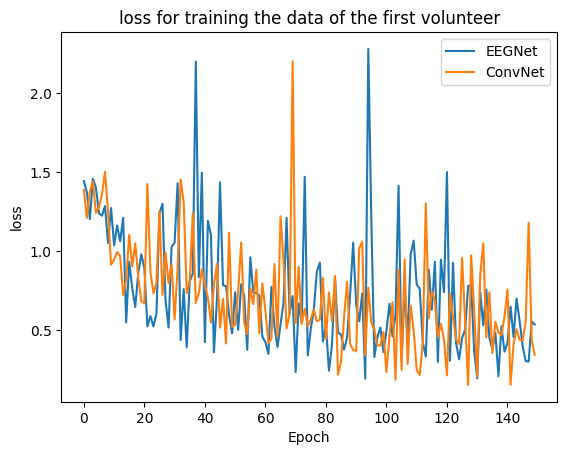

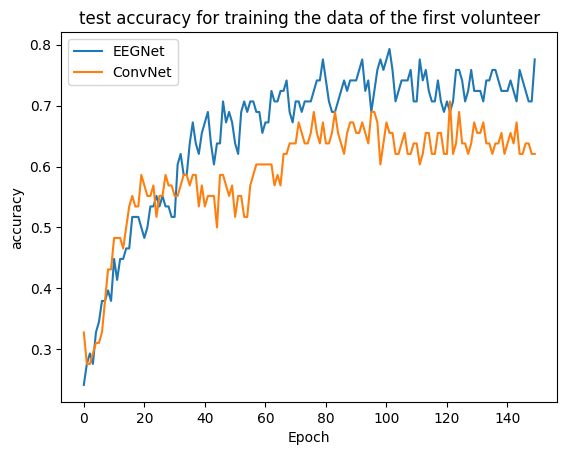

In [111]:
import matplotlib.pyplot as plt
loss_T01_1_EEGNet = np.load('loss_plot_T01_1_EEGNet.npy')
loss_T01_1_ConvNet = np.load('loss_plot_T01_1_ConvNet.npy')

plt.title('loss for training the data of the first volunteer')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.plot(loss_T01_1_EEGNet)
plt.plot(loss_T01_1_ConvNet)
plt.legend(['EEGNet','ConvNet'])
plt.show()

acc_T01_1_EEGNet = np.load('acc_plot_T01_1_EEGNet.npy')
acc_T01_1_ConvNet = np.load('acc_plot_T01_1_ConvNet.npy')

plt.title('test accuracy for training the data of the first volunteer')
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.plot(acc_T01_1_EEGNet)
plt.plot(acc_T01_1_ConvNet)
plt.legend(['EEGNet','ConvNet'])
plt.show()

Plot the final result of the ten-fold validation of all the models.

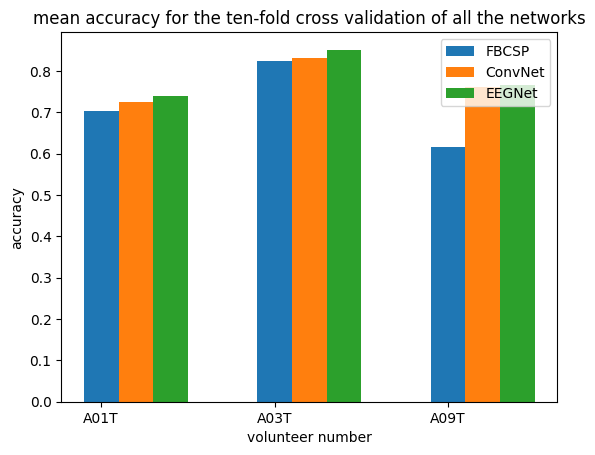

In [120]:
acc_T01_conv = np.mean(np.load('acc_T01_ConvNet.npy'))
acc_T01_eeg = np.mean(np.load('acc_T01_EEGNet.npy'))
acc_T09_conv = np.mean(np.load('acc_T09_ConvNet.npy'))
acc_T09_eeg = np.mean(np.load('acc_T09_EEGNet.npy'))
acc_T03_conv = np.mean(np.load('acc_T03_ConvNet.npy'))
acc_T03_eeg = np.mean(np.load('acc_T03_EEGNet.npy'))
acc_T01_FBCSP = np.mean(np.load('acc_FBCSP.npy')[0,:])
acc_T09_FBCSP = np.mean(np.load('acc_FBCSP.npy')[1,:])
acc_T03_FBCSP = np.mean(np.load('acc_FBCSP.npy')[2,:])
x_width = range(0,3)
x_data = ['A01T','A03T','A09T']
x2_width = [i+0.2 for i in x_width]
x3_width = [i+0.4 for i in x_width]
plt.title('mean accuracy for the ten-fold cross validation of all the networks')
plt.bar(x_width,[acc_T01_FBCSP,acc_T03_FBCSP,acc_T09_FBCSP],lw=0.5,width=0.2,label='FBCSP')
plt.bar(x2_width,[acc_T01_conv,acc_T03_conv,acc_T09_conv],lw=0.5,width=0.2,label='ConvNet')
plt.bar(x3_width,[acc_T01_eeg,acc_T03_eeg,acc_T09_eeg],lw=0.5,width=0.2,label='EEGNet')
plt.xticks(range(0,3),x_data)
plt.legend()
plt.ylabel('accuracy')
plt.xlabel('volunteer number')
plt.show()

The result shows that EEGNet performs slightly better than ConvNet for the chosen three volunteers, with much less parameters.